## Linear Regression with supervised machine learning

(Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.) 

-------------------------------------------------------------------------------------------------------------------------------

Importing modules, reading the data file and having a quick look at what's in it:

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv(r'C:\Users\Diana Crowe\Documents\Classes\Introduction to Data Science\Mini-Project\covid_data_22-09-2021_2-full.csv')
print(data.shape)
data.head()


(149, 13)


,Unnamed: 0,Country,Confirmed,proportion infected,Deaths,GDP,Population Density,2021 Population,Area,Literacy,Employment,Population 65 +,Foreigners
0,0,Albania,165096,5746.60,2601,14.80,100,2872933,28748,0.972489,0.707484,0.147591,0.018337
1,1,Algeria,202122,453.02,5739,145.00,19,44616624,2381741,0.774214,0.896187,0.053393,0.003512
2,2,Antigua and Barbuda,2625,2658.74,57,1.42,223,98731,442,0.990000,0.994403,0.088592,0.296995
3,3,Argentina,5245265,11501.30,114684,383.00,16,45605826,2780400,0.980849,0.938704,0.116861,0.045017
4,4,Armenia,254709,8581.47,5181,12.65,100,2968127,29743,0.996145,0.783675,0.119087,0.065531


We found a moderate correlation between the "proportion infected" and "Literacy", so we will work with those two columns:

In [5]:
x = data['proportion infected']
y1 = data['Literacy']

Making a quick plot to see what the two variables look like together:

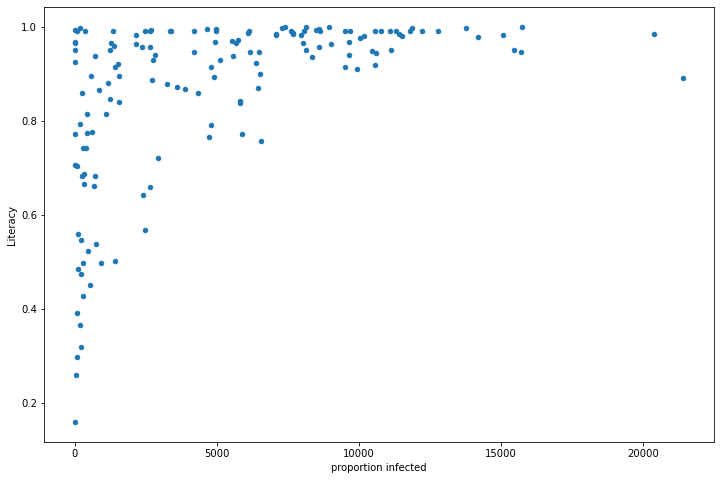

In [16]:
data.plot(kind = 'scatter', x = 'proportion infected', y = 'Literacy',figsize=(12,8))
plt.show()

Splitting the data into training and testing data sets:

In [13]:
# test train split, proportion infected and Literacy
X_train, X_test, y1_train, y1_test = train_test_split(x,y1)

Visualization of the two sets that we just created:

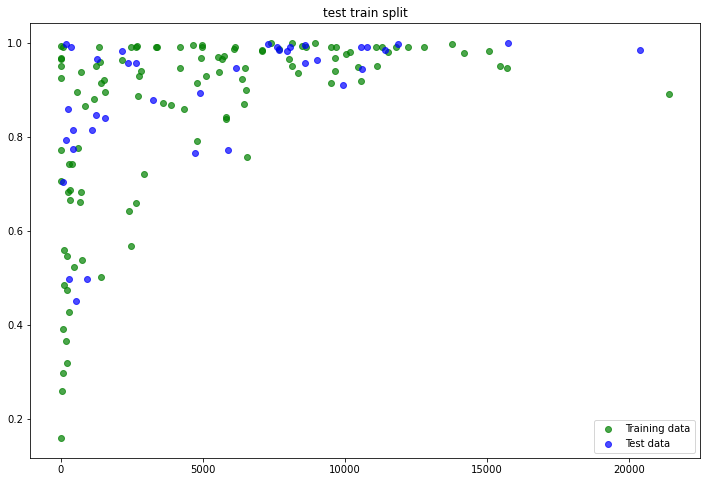

In [30]:
# visualization of proportion infected and Literacy
plt.figure(figsize=(12,8))
plt.scatter(X_train, y1_train, label="Training data", color="g", alpha=.7)
plt.scatter(X_test, y1_test, label="Test data", color="b", alpha=.7)
plt.legend()
plt.title('test train split')
plt.show()

Now we fit the training data in the model.

In [34]:
# linear model proportion infected & Literacy
LR1 = LinearRegression()
LR1.fit(X_train.values.reshape(-1,1), y1_train.values)

LinearRegression()

Now to have a look at the prediction:

<function matplotlib.pyplot.show(close=None, block=None)>

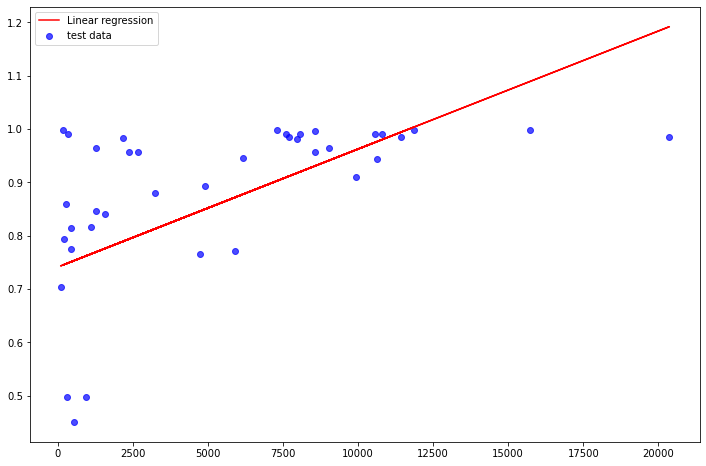

In [31]:
# predict proportion infected & Literacy
prediction1 = LR1.predict(X_test.values.reshape(-1,1))

# plot of prediction
plt.figure(figsize=(12,8))
plt.plot(X_test, prediction1, label='Linear regression', color='r')
plt.scatter(X_test, y1_test, label='test data', color='blue', alpha=.7)
plt.legend()
plt.show

We now score the model to see how well it did:

RMSE (root mean squared error): RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

R2 (R squared) score: the best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set:
y_train_predict = LR1.predict(X_train.values.reshape(-1,1))
rmse = (np.sqrt(mean_squared_error(y1_train, y_train_predict)))
r2 = r2_score(y1_train.values.reshape(-1,1), y_train_predict)

print("The model performance for training set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set:
y1_test_predict = LR1.predict(X_test.values.reshape(-1,1))
rmse = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
r2 = r2_score(y1_test.values.reshape(-1,1), y1_test_predict)

print("The model performance for testing set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set:
--------------------------------------
RMSE is 0.16655469687384963
R2 score is 0.26849053821132685


The model performance for testing set:
--------------------------------------
RMSE is 0.12826631191061863
R2 score is 0.20602211525643122
